In [1]:
# Rebeccah Duvoisin
# Read in the data.
import pandas as pd
import numpy as np
pd.options.display.max_rows = 8
%matplotlib inline

crime = pd.read_csv('../pa1/dec_2015_crimes.csv', parse_dates=['Date'])
print(crime.shape, crime.columns)

((21878, 22), Index([u'ID', u'Case Number', u'Date', u'Block', u'IUCR', u'Primary Type',
       u'Description', u'Location Description', u'Arrest', u'Domestic',
       u'Beat', u'District', u'Ward', u'Community Area', u'FBI Code',
       u'X Coordinate', u'Y Coordinate', u'Year', u'Updated On', u'Latitude',
       u'Longitude', u'Location'],
      dtype='object'))


In [2]:
# How often did a crime result in an arrest
print("{:.1f}% of Crimes resulted in arrest.".format((len(crime[crime['Arrest'] == True]) / len(crime)) * 100))

0.0% of Crimes resulted in arrest.


In [3]:
types_of_arrest = np.unique(crime[crime['Arrest'] == True]['Primary Type'])
arrests = crime[crime['Arrest'] == True].copy()   
arrests_by_type = [(len(arrests[arrests['Primary Type'] == i]), i) for i in types_of_arrest]
arrests_by_type.sort(reverse=True)
types_of_crimes = np.unique(crime['Primary Type'])
crimes_by_type = [(len(crime[crime['Primary Type'] == i]), i) for i in types_of_crimes]
crimes_by_type.sort(reverse=True)

# Types of crimes most often resulting in arrest
# Perspectives on what 'most often' means:
# - See crime types with the mosts overall arrests?
print("ARRESTS:\n")
for i in range(10):
    print("# {}. {}, {}".\
          format(i+1, \
                 arrests_by_type[i][1], \
                 arrests_by_type[i][0]))
    
# - See percent arrested within each crime type?
crimes_pct_arrests = [(float(len(arrests[arrests['Primary Type'] == \
                             crimes_by_type[i][1]]) \
                       / float(crimes_by_type[i][0]) * 100), \
                       crimes_by_type[i][1]) for i in range(len(crimes_by_type))] 
# Highest first
crimes_pct_arrests.sort(reverse=True)
crimes_pct_arrests = [(k, v) for v, k in crimes_pct_arrests]

crime_counts = {v:k for k, v in crimes_by_type}
print("\n WE REALLY NEED A REGRESSION TO ANSWER #3 FULLY DUE TO DIFFERING\n\
 SAMPLE SIZES, BUT HERE'S A SIMPLE TABLE OF CRIMES BY THEIR PERCENT OF ARRESTS. \n\n\
 ALSO IT'S PROBABLY BETTER THAT WE LIMIT THIS TABLE TO CRIMES \n\
 THAT EXPLAIN AT LEAST 5% (~{:.1f}) OF ALL ARRESTS.".format(0.05 * len(arrests)))
types = [(i[0], "{}, {:.1f}% Arrested, {:.1f}% of CRIME ({}) and {:.1f}% of ARRESTS ({}) ".\
              format(i[0], i[1], \
                     crime_counts[i[0]] * 100 / len(crime), \
                     crime_counts[i[0]], \
                     ((i[1] / 100) * crime_counts[i[0]] * 100) / len(arrests), \
                     int((i[1]/100) * crime_counts[i[0]]))) \
                     for i in crimes_pct_arrests if (i[1]/100) * crime_counts[i[0]] >= 0.05 * len(arrests)]
top_types = [i[0] for i in types]
[i[1] for i in types]
    

ARRESTS:

# 1. NARCOTICS, 1187
# 2. BATTERY, 805
# 3. THEFT, 400
# 4. ASSAULT, 235
# 5. CRIMINAL TRESPASS, 228
# 6. OTHER OFFENSE, 216
# 7. CRIMINAL DAMAGE, 111
# 8. WEAPONS VIOLATION, 110
# 9. PUBLIC PEACE VIOLATION, 95
# 10. PROSTITUTION, 66

 WE REALLY NEED A REGRESSION TO ANSWER #3 FULLY DUE TO DIFFERING
 SAMPLE SIZES, BUT HERE'S A SIMPLE TABLE OF CRIMES BY THEIR PERCENT OF ARRESTS. 

 ALSO IT'S PROBABLY BETTER THAT WE LIMIT THIS TABLE TO CRIMES 
 THAT EXPLAIN AT LEAST 5% (~183.8) OF ALL ARRESTS.


['NARCOTICS, 100.0% Arrested, 5.0% of CRIME (1187) and 32.3% of ARRESTS (1187) ',
 'CRIMINAL TRESPASS, 48.5% Arrested, 2.0% of CRIME (470) and 6.2% of ARRESTS (228) ',
 'BATTERY, 19.6% Arrested, 18.0% of CRIME (4099) and 21.9% of ARRESTS (805) ',
 'ASSAULT, 17.5% Arrested, 6.0% of CRIME (1341) and 6.4% of ARRESTS (235) ',
 'OTHER OFFENSE, 16.4% Arrested, 6.0% of CRIME (1318) and 5.9% of ARRESTS (215) ',
 'THEFT, 7.7% Arrested, 23.0% of CRIME (5202) and 10.9% of ARRESTS (400) ']

In [4]:
# Number of weapons violations (Primary Type) by district
grouped = crime[crime['Primary Type'] == 'WEAPONS VIOLATION'][['District', 'Primary Type']].groupby(['District'])
grouped.size()

District
1      1
2      5
3      8
4     12
      ..
20     3
22     3
24     3
25     9
dtype: int64

In [5]:
# Count arrests by days of the week
# Day of the week with the most arrests...
def get_dayofweek(date):
    return date.dayofweek
arrests['Day'] = arrests['Date'].apply(get_dayofweek)

print(arrests.groupby(['Day']).size())
print('Mondays', arrests.groupby(['Day']).size().max())

Day
0    402
1    625
2    563
3    494
4    500
5    551
6    541
dtype: int64
('Mondays', 625)


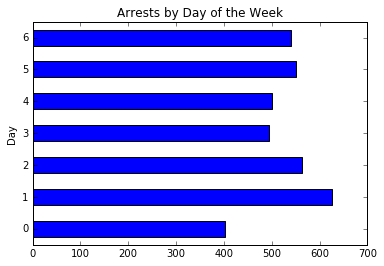

In [6]:
# Some charts
%matplotlib inline
arrests_by_day = arrests.groupby(['Day']).size()
arrests_by_day.plot(kind='barh', title='Arrests by Day of the Week')

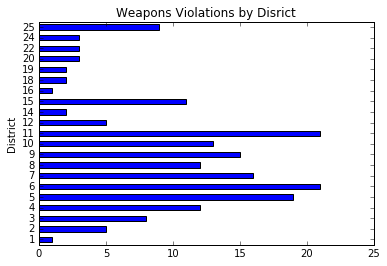

In [7]:
grouped.size().plot(kind='barh', title='Weapons Violations by Disrict')

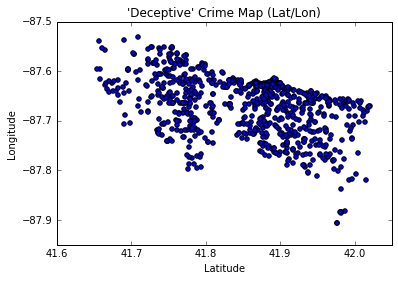

In [8]:
# Plot of lat vs long 
# for those crimes where the Primary Type was deceptive pratice.
deceptive_crime = crime[crime['Primary Type'] == 'DECEPTIVE PRACTICE']
deceptive_crime.plot(kind='scatter', x='Latitude', y='Longitude', title="'Deceptive' Crime Map (Lat/Lon)")

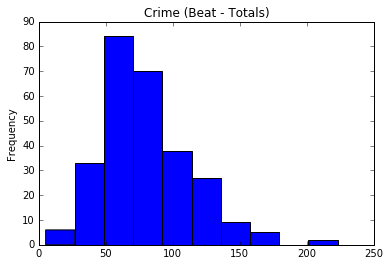

In [9]:
# Distribution of arrests per beat.
crime.groupby('Beat').size().plot(kind='hist', title="Crime (Beat - Totals)")

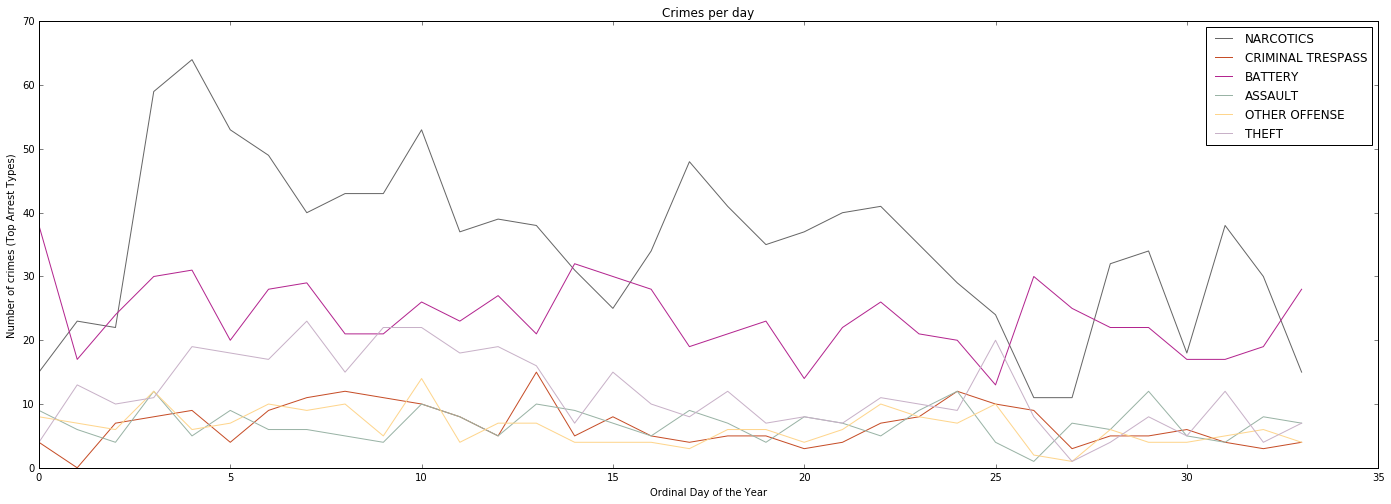

In [10]:
# More intereseting visualizations...

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from __future__ import division


def get_nice_colors(n_colors):
    return cm.Accent([1 - (i/n_colors) for i in range(n_colors)])

def get_date(date):
    return date.dayofyear
FIGWIDTH, FIGHEIGHT = 12, 8

# Get unique number for each day in arrest data.
arrests['Date_Month'] = arrests['Date'].apply(get_date)
month_days = np.unique(arrests['Date_Month']).tolist()

# Dictionary of np.arrays of Date_Month 
# counts for each type of the top Primary Types:
top_types_daily_counts = {}

for tp in top_types:
    top_types_daily_counts[tp] = len(month_days)*[0]
    
for day in range(len(month_days)):
    for tp in top_types_daily_counts:
        top_types_daily_counts[tp][day] = \
            arrests[(arrests['Primary Type'] == tp) & \
                  (arrests['Date_Month'] == month_days[day])].count()["Date_Month"]


# Plot attributes.
fig = plt.figure(figsize=(FIGWIDTH * 2, FIGHEIGHT))
title = 'Crimes per day'
plt.title(title)
y_axis_label = 'Number of crimes (Top Arrest Types)'
x_axis_label = 'Ordinal Day of the Year'
color_row = 0

colors = get_nice_colors(len(top_types_daily_counts.keys()))

total_days = arrests.groupby(['Date_Month']).size().shape[0] 
xs = np.arange(total_days)

for arrest_type in top_types:
    ys = np.array(top_types_daily_counts[arrest_type])
    color_list = colors[color_row: color_row + 1].tolist()[0][0:]
    color = tuple(color_list)
    line_chart = plt.plot(xs, ys, color=color, \
                         label=arrest_type)
    color_row +=1

# Plot formatting.
plt.ylabel(y_axis_label)
plt.xlabel(x_axis_label)
plt.legend()                             